# Analisis de los archivos #

Codigo fuente de la clase para llevar a cabo el analisis de logs de capturas de pantallas de **iperf**.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Analisis:
    def __init__(self):
        self.metricas = {'tiempo': [], 'bw': []}
        self.summary = [] # Incompleto aun

    def analizarLog(self,name):
        puntos = []
        ban = 0
        f = open(name, "r")
        lineas = f.readlines()
        f.close()
        for l in lineas[6:len(lineas)]:
            l = l.strip()
            # print l
            l = l.split()
            if (l[0] != '-' and ban == 0):
                puntos.append(l)
            elif (l[0] == '-'):
                ban = 1
            elif ban == 1:
                # print (l)
                self.summary.append(l)
        for linea in puntos:
            self.metricas['tiempo'].append(float(linea[2].split('-')[0]))
            self.metricas['bw'].append(linea[6])

    def retortarMetricas(self):
        return np.array([self.metricas['tiempo'], self.metricas['bw']], dtype=float)

    def graficar(self,titulo = 'GRAFICA'):
        plt.title(titulo)
        plt.xlabel('tiempo [seg]')
        plt.ylabel('ancho de banda [Mbits/sec]')
        plt.plot(self.metricas['tiempo'], self.metricas['bw'])
        plt.show()

Analizando cada uno de los logs

In [3]:
log1 = Analisis()
log1.analizarLog("server_bw1.log")
metrics1 = log1.retortarMetricas()

log2 = Analisis()
log2.analizarLog("server_bw2.log")
metrics2 = log2.retortarMetricas()

log3 = Analisis()
log3.analizarLog("server_bw3.log")
metrics3 = log3.retortarMetricas()

log4 = Analisis()
log4.analizarLog("server_bw4.log")
metrics4 = log4.retortarMetricas()

Llevando a cabo las graficas

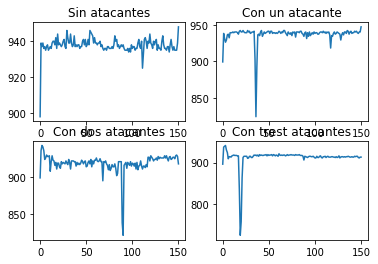

In [4]:
plt.close('all')

f, axarr = plt.subplots(2, 2)

axarr[0, 0].plot(metrics1[0,:], metrics1[1,:])
axarr[0, 0].set_title('Sin atacantes')
axarr[0, 1].plot(metrics2[0,:], metrics2[1,:])
axarr[0, 1].set_title('Con un atacante')
axarr[1, 0].plot(metrics3[0,:], metrics3[1,:])
axarr[1, 0].set_title('Con dos atacantes')
axarr[1, 1].plot(metrics4[0,:], metrics4[1,:])
axarr[1, 1].set_title('Con trest atacantes')

plt.show()